In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./dataA.csv')
data.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,-0.084787,-0.68541,-0.244709,-0.196223,0.361252,-0.132463,-0.625504,-0.317443,-0.359303,-0.336093,...,-0.343648,-0.398552,-0.417145,-0.476095,-0.558694,0,0,1,0,0


# Best Features

In [3]:
y = data['Type_mine']
X = data.drop('Type_mine',axis = 1)

# Holdout

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3)

In [5]:
model = svm.SVC(probability=True)

In [6]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
y_pred = model.predict(X_test)

([<matplotlib.axis.YTick at 0x1b1a9dbb1d0>,
 <a list of 2 Text yticklabel objects>)

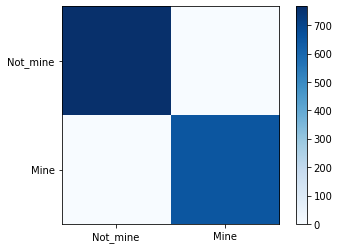

In [8]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [9]:
pd.DataFrame(churm)

,0,1
0,766,1
1,0,653


In [10]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.9992957746478873
Kappa:  0.9985825740455333


In [11]:
print(colored('Metricas de los registros mineros', attrs=['bold']))

print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VN = churm[0,0]
FP = churm[0,1]
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Metricas de los registros mineros
Precisión     :  0.9984709480122325
Recall        :  1.0
Especificidad :  0.9986962190352021
F1-score      :  0.9992348890589136


In [12]:
print(colored('Metricas de los registros no mineros', attrs=['bold']))

print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VN = churm[1,1]
FP = churm[1,0]
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Metricas de los registros no mineros
Precisión     :  1.0
Recall        :  0.9986962190352021
Especificidad :  1.0
F1-score      :  0.9993476842791911


In [13]:
y_pred_proba = model.predict_proba(X_test)

In [14]:
lr_probs = y_pred_proba[:,1]

In [15]:
ns_probs = [0 for _ in range(len(y_test))]

In [16]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [17]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

1.0

In [18]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VSM: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
VSM: ROC AUC=1.000


In [19]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

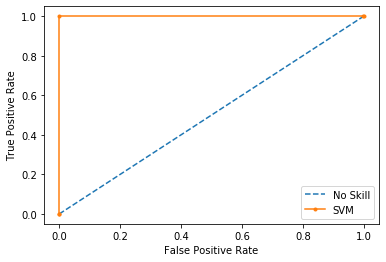

In [20]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()